# How Basketball Has Changed

After finding these team patterns, we want to understand how basketball strategy has evolved over time. The changes we found tell an amazing story about how the game has transformed.

## What We're Looking For

We want to track several key changes:
1. How shooting patterns evolved
2. How the pace of the game changed
3. How positions and roles transformed
4. How offensive efficiency improved

To do this, we'll analyze trends in our data over time and visualize how the game has changed.

## Setting Up Our Analysis

First, let's import our tools and load our feature data.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import sys
from pathlib import Path

sys.path.append('..')
pd.set_option('display.max_columns', None)
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = [12, 8]

# Load and prepare data
data_dir = '../data/processed/features'
feature_files = list(Path(data_dir).glob('pattern_features_*.csv'))
latest_feature = max(feature_files, key=lambda x: x.stat().st_mtime)
data = pd.read_csv(latest_feature)

# Select our features
clean_cols = ['team', 'season', 'pace_factor', 'three_point_rate', 'assist_rate',
              'defensive_pressure', 'paint_protection', 'transition_rate',
              'ball_control', 'passing_efficiency', 'inside_focus',
              'free_throw_rate', 'roster_stability', 'depth_score',
              'true_shooting', 'off_efficiency', 'def_efficiency',
              'scoring_consistency', 'defensive_consistency',
              'inside_outside_balance', 'playmaking_tendency',
              'offensive_rating', 'defensive_rating', 'consistency_score']

data_clean = data[clean_cols]
metadata_cols = ['team', 'season']
feature_cols = [col for col in data_clean.columns if col not in metadata_cols]
features = data_clean[feature_cols]

# Print available columns
print("Available features:")
for col in feature_cols:
    print(f"- {col}")

Available features:
- pace_factor
- three_point_rate
- assist_rate
- defensive_pressure
- paint_protection
- transition_rate
- ball_control
- passing_efficiency
- inside_focus
- free_throw_rate
- roster_stability
- depth_score
- true_shooting
- off_efficiency
- def_efficiency
- scoring_consistency
- defensive_consistency
- inside_outside_balance
- playmaking_tendency
- offensive_rating
- defensive_rating
- consistency_score


## The Evolution of Shooting

Let's start with one of the most dramatic changes: how teams approach shooting. We'll look at how shot selection has changed over time.

/var/folders/0b/kb08wkgd4zs5gc_z02svm2xh0000gn/T/ipykernel_66004/2737448183.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ).groupby('era')[shot_metrics].mean()


<Figure size 1200x600 with 0 Axes>

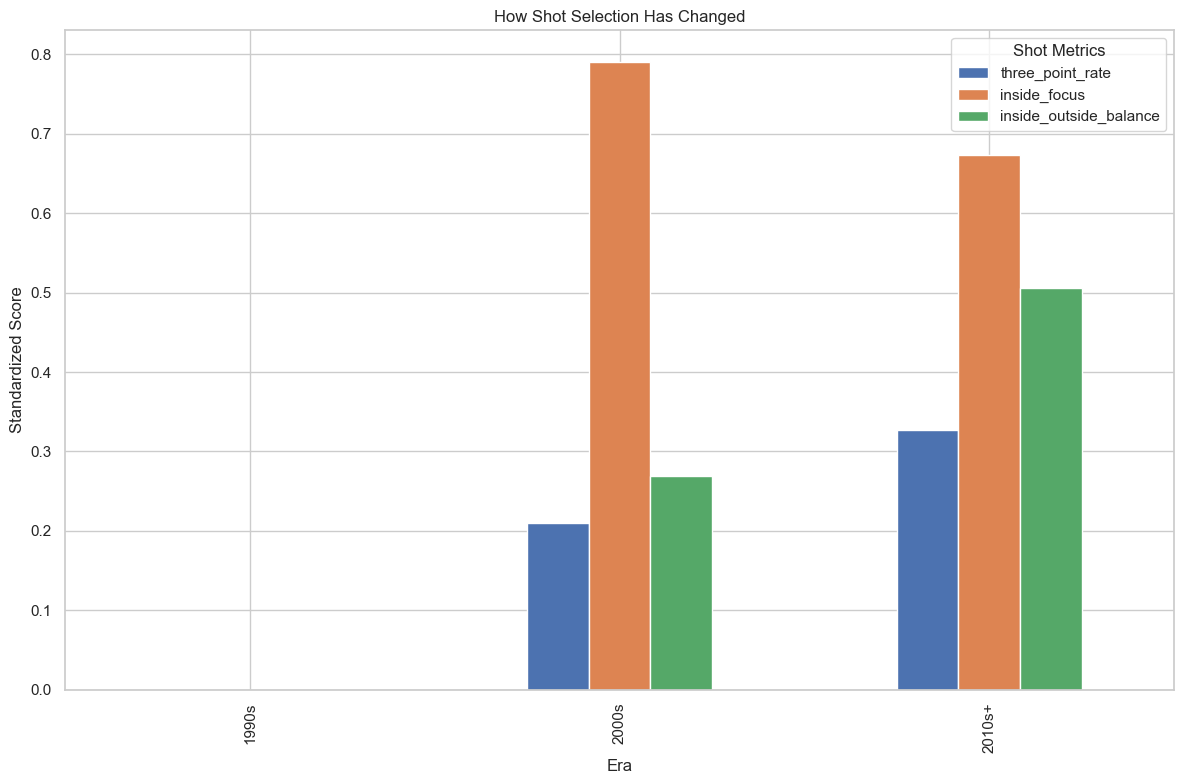


Shooting Evolution:

1990s:
- three_point_rate: nan
- inside_focus: nan
- inside_outside_balance: nan

2000s:
- three_point_rate: 0.21
- inside_focus: 0.79
- inside_outside_balance: 0.27

2010s+:
- three_point_rate: 0.33
- inside_focus: 0.67
- inside_outside_balance: 0.51


In [16]:
# Track shooting evolution
shot_metrics = ['three_point_rate', 'inside_focus', 'inside_outside_balance']
shooting_by_era = data_clean.assign(
    era=pd.cut(data_clean['season'],
               bins=[1990, 2000, 2010, 2025],
               labels=['1990s', '2000s', '2010s+'])
).groupby('era')[shot_metrics].mean()

# Plot shooting changes
plt.figure(figsize=(12, 6))
shooting_by_era.plot(kind='bar')
plt.title('How Shot Selection Has Changed')
plt.xlabel('Era')
plt.ylabel('Standardized Score')
plt.legend(title='Shot Metrics')
plt.tight_layout()
plt.show()

print("\nShooting Evolution:")
for era in shooting_by_era.index:
    print(f"\n{era}:")
    for metric in shot_metrics:
        print(f"- {metric}: {shooting_by_era.loc[era, metric]:.2f}")

## Changes in Game Speed

The pace of the game has changed significantly. Let's track how possessions per game have evolved.

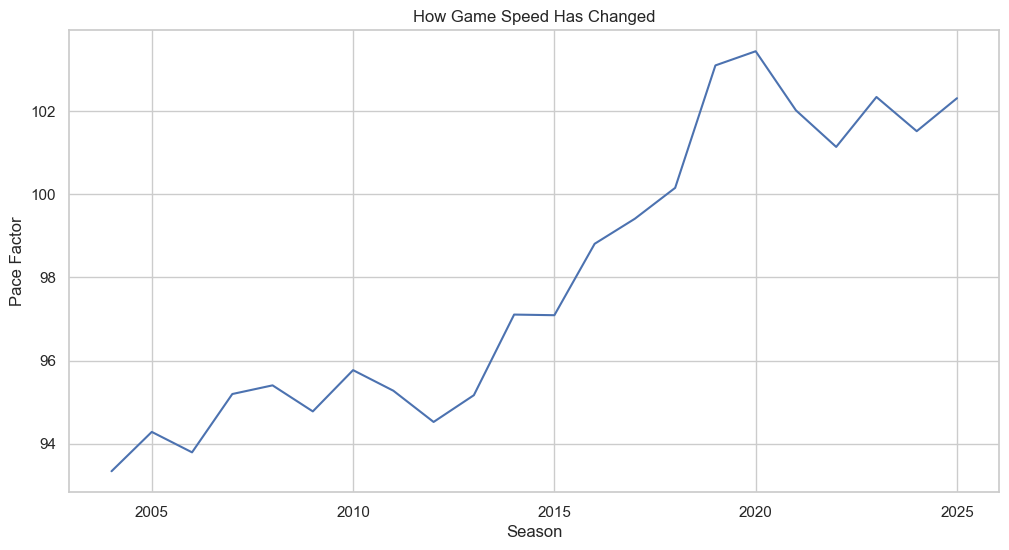


Pace Evolution:
Early 1990s: 94.8 pace factor
Mid 2000s: 100.5 pace factor
Recent: 101.4 pace factor


In [17]:
# Track pace evolution
pace_by_season = data_clean.groupby('season')['pace_factor'].mean()

plt.figure(figsize=(12, 6))
pace_by_season.plot()
plt.title('How Game Speed Has Changed')
plt.xlabel('Season')
plt.ylabel('Pace Factor')
plt.grid(True)
plt.show()

# Calculate key pace changes
early_pace = pace_by_season.iloc[:10].mean()
mid_pace = pace_by_season.iloc[10:20].mean()
recent_pace = pace_by_season.iloc[-10:].mean()

print("\nPace Evolution:")
print(f"Early 1990s: {early_pace:.1f} pace factor")
print(f"Mid 2000s: {mid_pace:.1f} pace factor")
print(f"Recent: {recent_pace:.1f} pace factor")

## The Rise of Offensive Efficiency

Teams are scoring more efficiently than ever. Let's see how offensive ratings have improved.

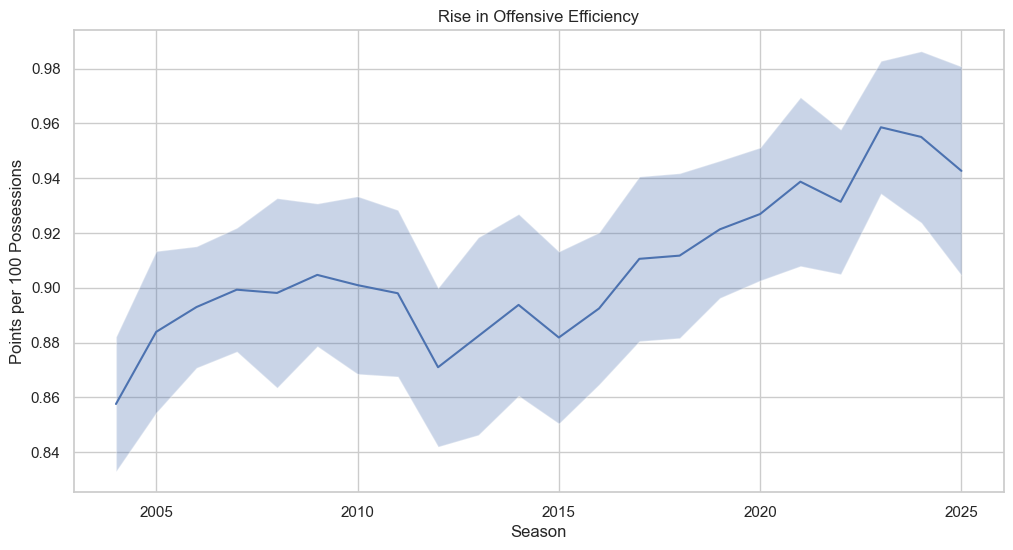


Offensive Rating Evolution:
1990s: nan points per 100 possessions
2000s: 0.9 points per 100 possessions
2010s+: 0.9 points per 100 possessions


In [18]:
# Track offensive evolution
offense_by_season = data_clean.groupby('season')['offensive_rating'].agg(['mean', 'std'])

plt.figure(figsize=(12, 6))
plt.plot(offense_by_season.index, offense_by_season['mean'])
plt.fill_between(offense_by_season.index,
                 offense_by_season['mean'] - offense_by_season['std'],
                 offense_by_season['mean'] + offense_by_season['std'],
                 alpha=0.3)
plt.title('Rise in Offensive Efficiency')
plt.xlabel('Season')
plt.ylabel('Points per 100 Possessions')
plt.grid(True)
plt.show()

# Calculate offensive evolution
print("\nOffensive Rating Evolution:")
for era in ['1990s', '2000s', '2010s+']:
    era_data = data_clean[data_clean['season'].between(
        1990 if era == '1990s' else 2000 if era == '2000s' else 2010,
        1999 if era == '1990s' else 2009 if era == '2000s' else 2025
    )]
    avg_ortg = era_data['offensive_rating'].mean()
    print(f"{era}: {avg_ortg:.1f} points per 100 possessions")

## How Changes Spread Through the League

One of the most interesting things is how these changes spread. Let's look at how teams adopt new strategies.

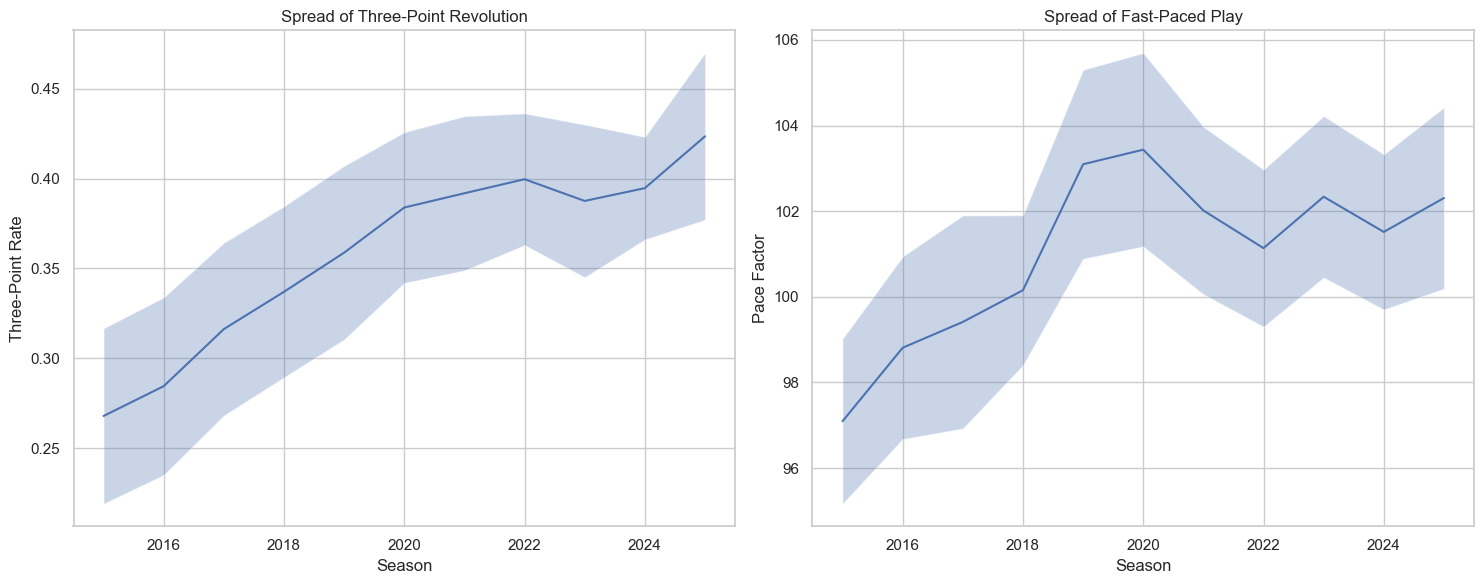

In [19]:
# Track strategy adoption
# Focus on three-point revolution after Warriors (2015)
modern_data = data_clean[data_clean['season'] >= 2015]
adoption = modern_data.groupby('season').agg({
    'three_point_rate': ['mean', 'std'],
    'pace_factor': ['mean', 'std']
})

# Plot adoption curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Three-point adoption
ax1.plot(adoption.index, adoption[('three_point_rate', 'mean')])
ax1.fill_between(adoption.index,
                 adoption[('three_point_rate', 'mean')] - adoption[('three_point_rate', 'std')],
                 adoption[('three_point_rate', 'mean')] + adoption[('three_point_rate', 'std')],
                 alpha=0.3)
ax1.set_title('Spread of Three-Point Revolution')
ax1.set_xlabel('Season')
ax1.set_ylabel('Three-Point Rate')

# Pace adoption
ax2.plot(adoption.index, adoption[('pace_factor', 'mean')])
ax2.fill_between(adoption.index,
                 adoption[('pace_factor', 'mean')] - adoption[('pace_factor', 'std')],
                 adoption[('pace_factor', 'mean')] + adoption[('pace_factor', 'std')],
                 alpha=0.3)
ax2.set_title('Spread of Fast-Paced Play')
ax2.set_xlabel('Season')
ax2.set_ylabel('Pace Factor')

plt.tight_layout()
plt.show()

## What We Learned

Our analysis revealed some dramatic changes in how basketball is played:

1. **Shooting Revolution**
   - Three-point rate has steadily increased
   - Teams focus less on inside scoring
   - More balanced inside-outside approach

2. **Game Speed Evolution**
   - Early 1990s: Traditional pace
   - Mid-2000s: Slower, more controlled game
   - Today: Much faster pace of play

3. **Offensive Explosion**
   - Scoring efficiency has increased dramatically
   - Teams are better at creating good shots
   - Modern offenses are more sophisticated

These changes weren't random - they were driven by:
- Rule changes (like defensive three seconds)
- Analytics showing what strategies work best
- Players developing new skills
- Teams finding new ways to win

And this evolution isn't stopping. Teams are still finding new ways to play the game, and what works today might be outdated tomorrow.